## Feature Engineering

In [162]:
import pandas as pd

In [163]:
# load data
# bring in data
path = '/Users/reneehall/Documents/Learning/lighthouse_labs/coursework-lighthouse-labs/Mid-term project/colab_data/'
fl_df = pd.read_csv(path+'balanced_more_flight_feats.csv')

In [42]:
# choose smaller dataset for ease of work

sm_df = fl_df.sample(50000, random_state=26)

In [43]:
sm_df.to_csv(path+'mini_sample.csv', index=False)

In [78]:
pass_df = pd.read_csv(path+'passengers.csv')

## Airport size (from num passengers/year)

In [79]:
pass_per_yr_origin_airport = pass_df.groupby(by=['origin_airport_id']).sum().sort_values(by='passengers', ascending=False)

In [40]:
import numpy as np
small = np.percentile(pass_per_yr_origin_airport, q=78)
small

97729.00000000006

In [45]:
med = np.percentile(pass_per_yr_origin_airport, q=89)
med

1021742.9199999986

In [32]:
lrg = np.percentile(pass_per_yr_origin_airport, q=100)
lrg

257478059.0

In [80]:
airport_size = pass_per_yr_origin_airport

In [81]:
# 1:small, 2:med, 3:lrg, 4, xl
bins = [0, 100000, 1000000, 10000000, 300000000]
labels = [1,2,3,4]
airport_size['size'] = pd.cut(airport_size['passengers'], bins=bins, labels=labels)

In [82]:
airport_size = airport_size[['passengers','size']]

In [83]:
fl_df = pd.merge(fl_df, airport_size, left_on=['origin_airport_id'], right_on = ['origin_airport_id'])

In [84]:
fl_df.drop(labels='passengers', axis=1, inplace=True)

In [85]:
fl_df.rename(columns={'size': 'origin_airport_size'}, inplace=True)

In [86]:
fl_df = pd.merge(fl_df, airport_size, left_on=['dest_airport_id'], right_on = ['origin_airport_id'])

In [88]:
fl_df.drop(labels='passengers', axis=1, inplace=True)

In [89]:
fl_df.rename(columns={'size': 'dest_airport_size'}, inplace=True)

In [91]:
fl_df.shape

(600000, 45)

In [92]:
fl_df.to_csv(path+'balanced_more_flight_feats.csv')

## Season

In [93]:
fl_df.month.unique()

array([ 4,  7,  5,  6,  9,  1, 10, 12, 11,  3,  8,  2])

In [94]:
# winter dec-feb, spring march-may, summer june-aug, fall sep-nov
bins = [0, 2, 5, 8, 11]
labels = [1,2,3,4]
fl_df['season'] = pd.cut(fl_df['month'], bins=bins, labels=labels)

In [95]:
fl_df['season'] = fl_df['season'].fillna(1)

In [96]:
fl_df[['season','month']].head()

,season,month
0,2,4
1,3,7
2,2,5
3,3,6
4,4,9


In [97]:
fl_df.shape

(600000, 46)

In [99]:
fl_df.to_csv(path+'balanced_more_flight_feats.csv')

## short medium long haul

In [100]:
# NOTE intervals of 500, label=1 is shortest
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]
labels = [1,2,3,4,5,6,7,8,9,10,11]
fl_df['dist_group'] = pd.cut(fl_df['distance'], bins=bins, labels=labels)

In [103]:
fl_df.isnull().sum().sort_values(ascending=False).head()

dist_group         0
dest_airport_id    0
taxi_in            0
wheels_on          0
wheels_off         0
dtype: int64

In [105]:
fl_df.to_csv(path+'balanced_more_flight_feats.csv')

## morning vs. afternoon (ex. after 10am)

In [106]:
fl_df.crs_dep_hour.unique()

array([12,  8, 16,  9, 17, 11, 19, 18,  6,  7, 21, 14, 20, 10, 15, 13, 22,
        5, 23,  0,  1,  2,  4,  3])

In [107]:
# NOTE early morning (before 10am) = 1
bins = [-1, 10, 23]
labels = [1,0]
fl_df['dep_early_morning'] = pd.cut(fl_df['crs_dep_hour'], bins=bins, labels=labels)

In [108]:
fl_df.isnull().sum().sort_values(ascending=False).head()

dep_early_morning    0
dist_group           0
crs_arr_time         0
taxi_in              0
wheels_on            0
dtype: int64

In [109]:
fl_df.shape

(600000, 48)

In [110]:
fl_df.to_csv(path+'balanced_more_flight_feats.csv')

## Delay/carrier overall

In [111]:
op_carrier_mean_delay = fl_df.groupby(by=['op_unique_carrier']).arr_delay.mean().sort_values(ascending=False)

In [221]:
x = op_carrier_mean_delay.index.tolist()

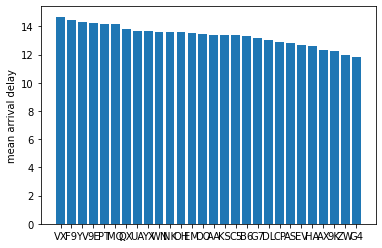

In [224]:
import matplotlib.pyplot as plt

x = op_carrier_mean_delay.index.tolist()
y = op_carrier_mean_delay['arr_delay']
plt.bar(x=x, height=y)
plt.ylabel('mean arrival delay')
plt.show()

In [112]:
fl_df = pd.merge(fl_df, op_carrier_mean_delay, left_on=['op_unique_carrier'], right_on = ['op_unique_carrier'])

In [269]:
fl_df.isnull().sum()

fl_date                  0
mkt_unique_carrier       0
branded_code_share       0
mkt_carrier              0
mkt_carrier_fl_num       0
op_unique_carrier        0
tail_num                 0
op_carrier_fl_num        0
origin_airport_id        0
origin                   0
origin_city_name         0
dest_airport_id          0
dest                     0
dest_city_name           0
crs_dep_time             0
dep_time                 0
dep_delay                0
taxi_out                 0
wheels_off               0
wheels_on                0
taxi_in                  0
crs_arr_time             0
arr_time                 0
arr_delay_x              0
cancelled                0
diverted                 0
crs_elapsed_time         0
actual_elapsed_time      0
air_time                 0
flights                  0
distance                 0
origin_fl_density        0
dest_fl_density          0
day                      0
month                    0
year                     0
weekday                  0
d

In [113]:
fl_df.rename(columns={'arr_delay_y': 'mean_op_carrier_delay'}, inplace=True)
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay_x', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay'],
      dtype='object')

In [118]:
fl_df.rename(columns={'arr_delay_x': 'arr_delay'}, inplace=True)
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay'],
      dtype='object')

In [114]:
fl_df.shape

(600000, 49)

In [115]:
fl_df.isnull().sum().sort_values(ascending=False).head()

mean_op_carrier_delay    0
arr_delay_x              0
crs_arr_time             0
taxi_in                  0
wheels_on                0
dtype: int64

In [119]:
fl_df.to_csv(path+'balanced_more_flight_feats.csv', index=False)

## *Delay/carrier/month

In [258]:
op_carrier_mo_mean_delay = fl_df.groupby(by=['op_unique_carrier', 'month']).arr_delay.mean().sort_values(ascending=False)

In [251]:
y = fl_df.loc[fl_df['op_unique_carrier'] == i].groupby(by=['month']).arr_delay.mean()
y

month
1     15.134149
2     13.475744
3      8.600000
4     13.924051
5     14.339252
6     13.867948
7     14.378797
8     10.950471
9      9.935552
10    15.573561
11    12.588639
12    13.114132
Name: arr_delay, dtype: float64

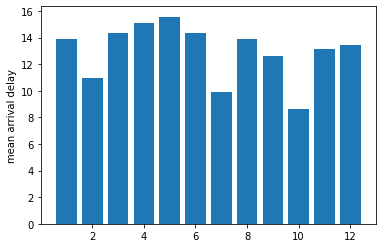

In [252]:
import matplotlib.pyplot as plt

i = fl_df['op_unique_carrier'].unique().tolist()[0]
x = fl_df['month'].unique().tolist()
y = fl_df.loc[fl_df['op_unique_carrier'] == i].groupby(by=['month']).arr_delay.mean()                                              
plt.bar(x=x, height=y)
plt.ylabel('mean arrival delay')
plt.show()

In [270]:
fl_df = pd.merge(fl_df, op_carrier_mo_mean_delay, left_on=['op_unique_carrier'], right_on = ['op_unique_carrier'])

In [272]:
fl_df.rename(columns={'arr_delay': 'mean_monthly_op_carrier_delay'}, inplace=True)
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay_x', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime', 'predicted_speed',
       'actual_speed', 'origin_num_passengers', 'dest_num_passengers',
       'origin_num_freight', 'dest_num_freight', 'origin_num_intl_dep',
       'dest_num_intl_dep', 'origin_num_intl_arr', 'dest_num_intl_arr',
       'dist_group', 'season', 'dep_early_mo

In [276]:
fl_df.rename(columns={'arr_delay_x': 'arr_delay'}, inplace=True)
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime', 'predicted_speed',
       'actual_speed', 'origin_num_passengers', 'dest_num_passengers',
       'origin_num_freight', 'dest_num_freight', 'origin_num_intl_dep',
       'dest_num_intl_dep', 'origin_num_intl_arr', 'dest_num_intl_arr',
       'dist_group', 'season', 'dep_early_morn

In [278]:
fl_df.to_csv(path+'balanced_more_flight_feats2.csv', index=False)

## Delay/airport overall

In [164]:
origin_airport_mean_delay = fl_df.groupby(by=['origin_airport_id']).arr_delay.mean()

In [290]:
origin_airport_mean_delay.index.tolist()

[10754,
 13933,
 14259,
 12265,
 16218,
 13029,
 14512,
 12244,
 10408,
 15356,
 11721,
 15323,
 15295,
 11986,
 11252,
 13230,
 12523,
 10747,
 12323,
 13832,
 13360,
 15070,
 11146,
 11577,
 11977,
 10185,
 14262,
 11122,
 12206,
 10208,
 14321,
 15249,
 15096,
 13485,
 11630,
 15024,
 14908,
 13061,
 10299,
 14696,
 13342,
 13577,
 14307,
 10868,
 13367,
 13830,
 13796,
 11042,
 13232,
 11697,
 12448,
 11775,
 13244,
 11540,
 14027,
 12016,
 10529,
 13891,
 11995,
 12003,
 14524,
 10874,
 11292,
 10581,
 12758,
 14685,
 15370,
 10821,
 10980,
 10599,
 11433,
 11057,
 11278,
 13303,
 13495,
 10423,
 12953,
 11003,
 10994,
 11267,
 15412,
 14107,
 12478,
 13256,
 14100,
 13930,
 13871,
 14122,
 10397,
 11638,
 12173,
 12339,
 13851,
 11298,
 14843,
 15016,
 14679,
 11637,
 11884,
 14747,
 11618,
 15304,
 14986,
 12892,
 14771,
 13487,
 14570,
 11109,
 11066,
 14869,
 15376,
 14492,
 11996,
 13198,
 11193,
 12889,
 14893,
 13204,
 11337,
 10721,
 12266,
 10466,
 14112,
 12191,
 14057,


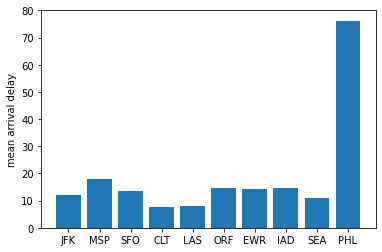

In [165]:
import matplotlib.pyplot as plt

x = fl_df.origin.unique().tolist()[:10]
y = origin_airport_mean_delay.tolist()[:10]                                           
plt.bar(x=x, height=y)
plt.ylabel('mean arrival delay')
plt.show()

In [121]:
fl_df = pd.merge(fl_df, origin_airport_mean_delay, left_on=['origin_airport_id'], right_on = ['origin_airport_id'])
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay_x', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay', 'arr_delay_y'],
      dtype='object')

In [122]:
fl_df.rename(columns={'arr_delay_x': 'arr_delay'}, inplace=True)
fl_df.rename(columns={'arr_delay_y': 'mean_delay_origin_airport'}, inplace=True)
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport'],
      dtype='object')

In [123]:
fl_df = pd.merge(fl_df, origin_airport_mean_delay, left_on=['dest_airport_id'], right_on = ['origin_airport_id'])
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay_x', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'arr_delay_y'],
      dtype='object')

In [124]:
fl_df.rename(columns={'arr_delay_x': 'arr_delay'}, inplace=True)
fl_df.rename(columns={'arr_delay_y': 'mean_delay_dest_airport'}, inplace=True)
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport'],
      dtype='object')

In [125]:
fl_df.shape

(600000, 51)

In [126]:
fl_df.isnull().sum().sort_values(ascending=False).head()

mean_delay_dest_airport    0
dest                       0
arr_time                   0
crs_arr_time               0
taxi_in                    0
dtype: int64

In [5]:
fl_df.shape

(600000, 51)

599995   -0.538462
599996   -0.538462
599997   -0.538462
599998   -0.538462
599999   -9.333333
Name: mean_delay_dest_airport, dtype: float64

## Delay/airport monthly

In [102]:
origin_airport_mo_mean_delay = fl_df.groupby(by=['origin_airport_id', 'month']).arr_delay.mean()

In [103]:
ap = fl_df.origin_airport_id.unique().tolist()[:1]
ap

[12478]

In [179]:
fl_df.loc[fl_df['origin_airport_id']==12478].head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,mean_delay_origin_airport,mean_delay_dest_airport,mean_mo_delay_origin_airport,mean_dep_delay_origin,mean_dep_delay_dest,percent_delay_dep_x,dist_group_delay_ratio,dist_group_delay_ratio.1,percent_delay_dep_y,dist_group_percent_delayed
0,2018-04-25,DL,AA_CODESHARE,AA,1281,DL,N925WN,4431,12478,JFK,...,13.413861,13.773598,16.807601,10.470292,10.25517,0.142857,0.122635,0.122635,0.219112,50.008806
1,2019-05-29,AA,AS,AS,318,DL,N997JL,221,12478,JFK,...,13.413861,13.773598,12.443008,10.470292,10.25517,0.000000,0.122635,0.122635,0.219112,50.008806
2,2019-09-30,NK,AS_CODESHARE,AS,2184,DL,N8509U,1568,12478,JFK,...,13.413861,13.773598,12.020487,10.470292,10.25517,0.000000,0.122635,0.122635,0.219112,50.008806
3,2018-05-29,WN,UA_CODESHARE,UA,2302,DL,N37263,1298,12478,JFK,...,13.413861,13.773598,12.443008,10.470292,10.25517,-0.000000,0.122635,0.122635,0.219112,50.008806
4,2018-02-16,AA,DL,DL,1577,DL,N704FR,1391,12478,JFK,...,13.413861,13.773598,12.804378,10.470292,10.25517,0.294118,0.122635,0.122635,0.219112,50.008806


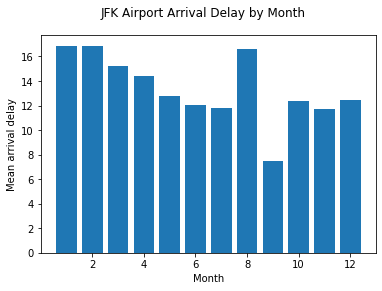

In [180]:
import matplotlib.pyplot as plt

x = fl_df.loc[fl_df['origin_airport_id']==12478].month.unique().tolist()
y = fl_df.loc[fl_df['origin_airport_id']==12478].groupby(by=['month']).arr_delay.mean()                                       
plt.bar(x=x, height=y)
plt.suptitle('JFK Airport Arrival Delay by Month')
plt.ylabel('Mean arrival delay')
plt.xlabel('Month')
plt.show()

In [105]:
fl_df = pd.merge(fl_df, origin_airport_mo_mean_delay, how='left', left_on=['origin_airport_id','month'], right_on = ['origin_airport_id', 'month'])
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay_x', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest', 'predicted_speed',
       'perce

In [106]:
fl_df.shape

(600000, 58)

In [107]:
fl_df.rename(columns={'arr_delay_x': 'arr_delay'}, inplace=True)
fl_df.rename(columns={'arr_delay_y': 'mean_mo_delay_origin_airport'}, inplace=True)
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest', 'predicted_speed',
       'percent

In [99]:
#fl_df = pd.merge(fl_df, origin_airport_mo_mean_delay, left_on=['dest_airport_id','month'], right_on = ['origin_airport_id','month'])
#fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay_x', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest', 'predicted_speed',
       'perce

In [9]:
#fl_df.rename(columns={'arr_delay_x': 'arr_delay'}, inplace=True)
#fl_df.rename(columns={'arr_delay_y': 'mean_mo_delay_dest_airport'}, inplace=True)
#fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime', 'predicted_speed',
       'actual_speed', 'origin_num_passengers', 'dest_num_passengers',
       'origin_num_freight', 'dest_num_freight', 'origin_num_intl_dep',
       'dest_num_intl_dep', 'origin_num_intl_arr', 'dest_num_intl_arr',
       'dist_group', 'season', 'dep_early_morn

In [109]:
fl_df.to_csv(path+'balanced_more_flight_feats.csv', index=False)

## mean departure delays

In [166]:
origin_mean_dep_delay = fl_df.groupby(by=['origin_airport_id']).dep_delay.mean()

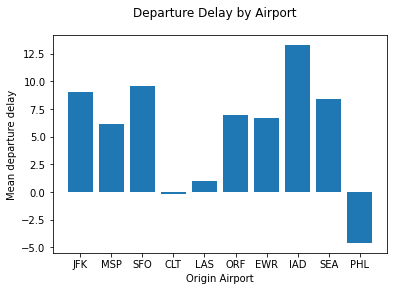

In [167]:
import matplotlib.pyplot as plt

x = fl_df.origin.unique().tolist()[:10]
y = origin_mean_dep_delay.tolist()[:10]                                           
plt.bar(x=x, height=y)
plt.suptitle('Departure Delay by Airport')
plt.ylabel('Mean departure delay')
plt.xlabel('Origin Airport')
plt.show()

In [8]:
fl_df = pd.merge(fl_df, origin_mean_dep_delay, left_on=['origin_airport_id'], right_on = ['origin_airport_id'])
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay_x', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport', 'dep_delay_y'],
      dtype='object')

In [9]:
fl_df.rename(columns={'dep_delay_x': 'dep_delay'}, inplace=True)
fl_df.rename(columns={'dep_delay_y': 'mean_dep_delay_origin'}, inplace=True)
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin'],
      dtype='object')

In [10]:
fl_df = pd.merge(fl_df, origin_mean_dep_delay, left_on=['dest_airport_id'], right_on = ['origin_airport_id'])
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay_x', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'dep_delay_y'],
      dtype='object')

In [11]:
fl_df.rename(columns={'dep_delay_x': 'dep_delay'}, inplace=True)
fl_df.rename(columns={'dep_delay_y': 'mean_dep_delay_dest'}, inplace=True)
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest'],
      dtype='object')

In [12]:
fl_df.rename(columns={'dep_delay_x': 'dep_delay'}, inplace=True)
fl_df.rename(columns={'dep_delay_y': 'mean_dep_delay_dest'}, inplace=True)

In [13]:
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest'],
      dtype='object')

In [14]:
fl_df.shape

(600000, 53)

In [15]:
fl_df.isnull().sum().sort_values(ascending=False).head()

mean_dep_delay_dest    0
diverted               0
arr_delay              0
arr_time               0
crs_arr_time           0
dtype: int64

In [18]:
fl_df.shape

(600000, 53)

## Delay ratio or percentage

In [22]:
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest', 'predicted_speed',
       'percent

In [23]:
delay_types = fl_df[['fl_date','op_carrier_fl_num','dep_delay','arr_delay','crs_elapsed_time']]

In [5]:
delay_types['change_delay'] = delay_types['arr_delay'] - delay_types['dep_delay']

<ipython-input-5-fdabd9113d95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_types['change_delay'] = delay_types['arr_delay'] - delay_types['dep_delay']


In [12]:
delay_types['percent_dep'] = (delay_types['dep_delay']/(delay_types['dep_delay'] + delay_types['arr_delay']))

In [13]:
delay_types['percent_dep'] = delay_types['percent_dep'].fillna(0.0)

In [14]:
import numpy as np

delay_types = delay_types.replace([np.inf, -np.inf], 0.0)

In [24]:
fl_df['delay_time_ratio'] = fl_df['arr_delay']/fl_df['crs_elapsed_time']

In [30]:
fl_df.delay_time_ratio.describe()

count    600000.000000
mean          0.122165
std           0.583218
min          -2.000000
25%          -0.093923
50%           0.000000
75%           0.141463
max          29.109890
Name: delay_time_ratio, dtype: float64

In [32]:
fl_df.isnull().sum().sort_values(ascending=False).head()

delay_time_ratio     0
percent_delay_dep    0
diverted             0
cancelled            0
arr_delay            0
dtype: int64

In [15]:
delay_types[['change_delay', 'percent_dep']].describe()

,change_delay,percent_dep
count,600000.000000,600000.000000
mean,2.972645,0.295496
std,74.570915,1.829049
min,-1684.000000,-41.000000
25%,-16.000000,-0.060345
50%,-1.000000,0.200000
75%,17.000000,0.666667
max,2602.000000,53.000000


In [16]:
delay_types.tail(10)

,fl_date,op_carrier_fl_num,dep_delay,arr_delay,change_delay,percent_dep
599990,2018-08-20,1932,0.0,-23.0,-23.0,-0.000000
599991,2018-08-07,1046,-10.0,14.0,24.0,-2.500000
599992,2019-10-29,5309,-12.0,-19.0,-7.0,0.387097
599993,2018-11-21,213,-8.0,48.0,56.0,-0.200000
599994,2018-03-15,1442,-3.0,-22.0,-19.0,0.120000
599995,2018-08-28,3386,20.0,-32.0,-52.0,-1.666667
599996,2019-03-10,772,2.0,-12.0,-14.0,-0.200000
599997,2018-11-06,2671,15.0,-16.0,-31.0,-15.000000
599998,2018-08-27,503,-2.0,-7.0,-5.0,0.222222
599999,2019-07-13,549,-9.0,-13.0,-4.0,0.409091


In [17]:
fl_df.shape

(600000, 54)

In [18]:
fl_df['percent_delay_dep'] = delay_types['percent_dep']

In [20]:
fl_df[['fl_date','op_carrier_fl_num','percent_delay_dep']].tail(10)

,fl_date,op_carrier_fl_num,percent_delay_dep
599990,2018-08-20,1932,-0.000000
599991,2018-08-07,1046,-2.500000
599992,2019-10-29,5309,0.387097
599993,2018-11-21,213,-0.200000
599994,2018-03-15,1442,0.120000
599995,2018-08-28,3386,-1.666667
599996,2019-03-10,772,-0.200000
599997,2018-11-06,2671,-15.000000
599998,2018-08-27,503,0.222222
599999,2019-07-13,549,0.409091


In [33]:
fl_df.to_csv(path+'balanced_more_flight_feats.csv', index=False)

In [34]:
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest', 'predicted_speed',
       'percent

In [39]:
delay_types = fl_df.groupby(by=['dist_group']).delay_time_ratio.mean()

In [41]:
delay_types

dist_group
1     0.123097
2     0.122635
3     0.120592
4     0.122543
5     0.115297
6     0.119428
7     0.090324
8     0.098310
9     0.072082
10    0.112347
11   -0.023149
Name: delay_time_ratio, dtype: float64

In [42]:
fl_df = pd.merge(fl_df, delay_types, left_on=['dist_group'], right_on = ['dist_group'])
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest', 'predicted_speed',
       'percent

In [45]:
fl_df.rename(columns={'delay_time_ratio_y': 'dist_group_delay_ratio'}, inplace=True)
fl_df.drop(labels=['delay_time_ratio_x'],axis=1, inplace=True)
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest', 'predicted_speed',
       'percent

In [47]:
fl_df[['dist_group','dist_group_delay_ratio']].tail()

,dist_group,dist_group_delay_ratio
599995,11,-0.023149
599996,11,-0.023149
599997,11,-0.023149
599998,11,-0.023149
599999,11,-0.023149


In [48]:
fl_df.shape

(600000, 56)

In [49]:
fl_df.isnull().sum().sort_values().tail()

arr_delay                 0
cancelled                 0
diverted                  0
percent_delay_dep         0
dist_group_delay_ratio    0
dtype: int64

In [50]:
fl_df.to_csv(path+'balanced_more_flight_feats.csv', index=False)

## percent departure delay

In [51]:
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest', 'predicted_speed',
       'percent

#### percent_delay_dep grouped by dist_group

In [61]:
per_dep_delay = fl_df.groupby(by=['dist_group']).percent_delay_dep.mean()

In [62]:
per_dep_delay

dist_group
1     0.296938
2     0.294138
3     0.286851
4     0.308051
5     0.296523
6     0.310944
7     0.369810
8     0.273069
9     0.393686
10    0.326433
11    0.070045
Name: percent_delay_dep, dtype: float64

In [63]:
# grouped by dist_group
per_dep_delay.describe()

count    11.000000
mean      0.293317
std       0.082387
min       0.070045
25%       0.290495
50%       0.296938
75%       0.318688
max       0.393686
Name: percent_delay_dep, dtype: float64

#### percent_delay_dep grouped by airport

In [77]:
per_dep_delay = fl_df.groupby(by=['origin_airport_id']).percent_delay_dep.mean().sort_values()

In [78]:
per_dep_delay.head()

origin_airport_id
11336   -0.630910
11415   -0.608630
14120   -0.458366
11097   -0.394484
14222   -0.371061
Name: percent_delay_dep, dtype: float64

In [66]:
per_dep_delay.tail()

origin_airport_id
10562    0.708333
14113    0.716413
14314    0.819070
14025    0.901576
10245    2.292659
Name: percent_delay_dep, dtype: float64

In [79]:
# grouped by airport
per_dep_delay.describe()

count    375.000000
mean       0.279983
std        0.194725
min       -0.630910
25%        0.217335
50%        0.286054
75%        0.335938
max        2.292659
Name: percent_delay_dep, dtype: float64

In [81]:
fl_df = pd.merge(fl_df, per_dep_delay, left_on=['origin_airport_id'], right_on = ['origin_airport_id'])
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest', 'predicted_speed',
       'percent

In [82]:
fl_df.rename(columns={'percent_delay_dep_y': 'dist_percent_delay_dep'}, inplace=True)
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest', 'predicted_speed',
       'percent

#### percent_delay_dep grouped by carrier

In [57]:
per_dep_delay = fl_df.groupby(by=['op_unique_carrier']).percent_delay_dep.mean().sort_values()

In [58]:
per_dep_delay.head()

op_unique_carrier
G7    0.258562
PT    0.262799
QX    0.271025
G4    0.271111
9E    0.282300
Name: percent_delay_dep, dtype: float64

In [59]:
per_dep_delay.tail()

op_unique_carrier
B6    0.314706
EV    0.320051
EM    0.333075
VX    0.366565
KS    0.431373
Name: percent_delay_dep, dtype: float64

In [60]:
# grouped by carrier
per_dep_delay.describe()

count    28.000000
mean      0.301257
std       0.033220
min       0.258562
25%       0.288222
50%       0.294452
75%       0.304511
max       0.431373
Name: percent_delay_dep, dtype: float64

#### percent_delay_dep grouped by carrier & airport

In [84]:
per_dep_delay = fl_df.groupby(by=['op_unique_carrier', 'origin_airport_id']).percent_delay_dep_x.mean().sort_values()

In [70]:
per_dep_delay.head()

op_unique_carrier  origin_airport_id
F9                 15027               -18.0
C5                 10157               -12.0
EV                 14802               -11.0
KS                 11953               -10.0
AA                 11336               -10.0
Name: percent_delay_dep, dtype: float64

In [85]:
# grouped by carrier and airport
per_dep_delay.describe()

count    8221.000000
mean        0.285339
std         0.865201
min       -18.000000
25%         0.072222
50%         0.280701
75%         0.480604
max        21.517951
Name: percent_delay_dep_x, dtype: float64

In [86]:
fl_df = pd.merge(fl_df, per_dep_delay, how='left',left_on=['origin_airport_id','op_unique_carrier'], right_on = ['origin_airport_id','op_unique_carrier'])

In [88]:
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest', 'predicted_speed',
       'percent

In [89]:
fl_df.rename(columns={'percent_delay_dep_x_y': 'ap_carr_percent_dep_delay'}, inplace=True)
fl_df.rename(columns={'percent_delay_dep_x_x': 'percent_dep_delay'}, inplace=True)
fl_df.drop(labels='dist_percent_delay_dep',axis=1, inplace=True)
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest', 'predicted_speed',
       'percent

In [90]:
fl_df.to_csv(path+'balanced_more_flight_feats.csv', index=False)

#### percent_delay_dep grouped by month

In [72]:
per_dep_delay = fl_df.groupby(by=['month']).percent_delay_dep.mean().sort_values()

In [73]:
per_dep_delay

month
11    0.282507
10    0.284388
7     0.284663
4     0.287813
12    0.287916
6     0.289581
5     0.291951
1     0.294891
8     0.296580
9     0.304306
3     0.321908
2     0.324746
Name: percent_delay_dep, dtype: float64

In [74]:
# month
per_dep_delay.describe()

count    12.000000
mean      0.295937
std       0.014153
min       0.282507
25%       0.287026
50%       0.290766
75%       0.298511
max       0.324746
Name: percent_delay_dep, dtype: float64

In [76]:
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_fl_density', 'dest_fl_density', 'day', 'month',
       'year', 'weekday', 'day_of_year', 'crs_arr_hour', 'crs_dep_hour',
       'timestamp', 'crs_arr_daytime', 'crs_dep_daytime',
       'origin_airport_size', 'dest_airport_size', 'season', 'dist_group',
       'dep_early_morning', 'mean_op_carrier_delay',
       'mean_delay_origin_airport', 'mean_delay_dest_airport',
       'mean_dep_delay_origin', 'mean_dep_delay_dest', 'predicted_speed',
       'percent